### **Purpose**


1.   Classify Medical Journals
2.   Gather High-level Insights through Exploratory Data Analysis 

### **Task_log**
1.   Word mixup issue






## **Data Extraction**

In [ ]:
#1. Mount Drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#2. imports

import os
import codecs
import pandas as pd
import nltk
import csv
from bs4 import BeautifulSoup
#-----------------------------
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import FreqDist
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
stopwords = stopwords.words('english')
#-----------------------------
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import string
import re
#-----------------------------
import spacy        
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_sm-0.2.4.tar.gz                                                        
import en_core_sci_sm                                                       
from spacy import displacy 
#-----------------------------
import random
#-----------------------------


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 17.0MB 2.1MB/s 
  Created wheel for en-core-sci-sm: filename=en_core_sci_sm-0.2.4-cp37-none-any.whl size=17161110 sha256=459bd3c1af6972901dd491069e8e07f24218968cc370da316cba3fcc2f405cf8
  Stored in directory: /root/.cache/pip/wheels/34/60/b9/fabd9c3eeba17ed66df745479f2fc502a6702755cb4a9632f2
Successfully built en-core-sci-sm


In [ ]:
#3. Set Working Directory

print('Initial CWD:',os.getcwd())
dataDirectory = '/content/drive/MyDrive/TextMining'
os.chdir(dataDirectory)
print('\nPost setting CWD:',os.getcwd())

Initial CWD: /content

Post setting CWD: /content/drive/MyDrive/TextMining


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#4. Select Medical Categories

''' 1. Diabetes
    2. Alcohol
    3. RNA'''

selectedMedCat= ['diabetes',
                 'alcohol',
                 'rna']

In [ ]:
#5. Gather list of category folder names and html file names

def listSize (lst):
    cols = list()
    for row in lst:
        cols.append(len(row))
    return cols

def fileNameList(selectedMedCat):
    htmlFileNameList = list()
    for cat in selectedMedCat:
                htmlFileNameList.append(os.listdir(cat))
    return htmlFileNameList

def folderNameList(htmlFileNameListSize):
    medCatNameList = list()

    for i,cols in enumerate(htmlFileNameListSize):
            medCatNameList.append((((selectedMedCat[i]+' ')*cols).split(' '))[:-1])
    return medCatNameList
    
htmlFileNameList = fileNameList(selectedMedCat)
htmlFileNameListSize = listSize(htmlFileNameList)
medCatNameList = folderNameList(htmlFileNameListSize)

In [ ]:
# #6. Read and load html medical journal files 

# removeFileNameList = list('Na')
# listOfMedHtml = list()
# listOfMedHtmlCat = list()

# def readHtmlFile(medCatNameList,htmlFileNameList,removeFileNameList,listOfMedHtml,listOfMedHtmlCat):

#     try:
#         catCounter = 0
#         fileCounter = 0
        
#         for i in range(0,len(medCatNameList)):
#             catCounter += 1
#             listOfMedHtml = list()
            
#             for catName,jorName in zip(medCatNameList[i],htmlFileNameList[i]):
#                 fileCounter += 1
#                 if jorName != '10659729.gdoc':
#                   hFile = codecs.open(catName+"/"+jorName, "r", "utf-8")
#                   listOfMedHtml.append(hFile.read())
#                   hFile.close()

#             listOfMedHtmlCat.append(listOfMedHtml)
#             print(len(listOfMedHtmlCat))

#         print('html reading is successful.')      

#         return listOfMedHtmlCat
    
#     except UnicodeDecodeError:
#             pass
#             print('UnicodeDecodeError', 'Cat count:',catCounter, 'File count:',fileCounter,'File name:',jorName)
#             removeFileNameList.append(jorName)
            
#             for c,cat in enumerate(htmlFileNameList):
#                     if jorName in cat:
#                         htmlFileNameList[c].remove(jorName)
#                         print(jorName,'removed')
#                         readHtmlFile(medCatNameList,htmlFileNameList,removeFileNameList,listOfMedHtml,listOfMedHtmlCat)
#                         print('exception, html reading is successful.')      
#                         return listOfMedHtmlCat
                    
# htmlMedJorsList = readHtmlFile(medCatNameList,htmlFileNameList,removeFileNameList,listOfMedHtml,listOfMedHtmlCat)

In [ ]:
#6. Read and load html medical journal files 

removeFileNameList = list('Na')
listOfMedHtml = list()
listOfMedHtmlCat = list()

def readHtmlFile(medCatNameList,htmlFileNameList,removeFileNameList,listOfMedHtml,listOfMedHtmlCat):
    

    try:
        catCounter = 0
        fileCounter = 0
        
        
        
        
        for i in range(0,len(medCatNameList)):
            catCounter += 1
            listOfMedHtml = list()
            
            for catName,jorName in zip(medCatNameList[i],htmlFileNameList[i]):
              if jorName != '10659729.gdoc': #Remove unsupported file names
                hFile = codecs.open(catName+"/"+jorName, "r", "utf-8")
                listOfMedHtml.append((hFile.read(),catName))
                hFile.close()

            listOfMedHtmlCat.append(listOfMedHtml)
            print(len(listOfMedHtmlCat))

        print('html reading is successful.')      

        return listOfMedHtmlCat
    
    except UnicodeDecodeError:
            pass
            print('UnicodeDecodeError', 'Cat count:',catCounter, 'File count:',fileCounter,'File name:',jorName)
            removeFileNameList.append(jorName)
            
            for c,cat in enumerate(htmlFileNameList):
                    if jorName in cat:
                        htmlFileNameList[c].remove(jorName)
                        print(jorName,'removed')
                        readHtmlFile(medCatNameList,htmlFileNameList,removeFileNameList,listOfMedHtml,listOfMedHtmlCat)
                        print('exception, html reading is successful.')      
                        return listOfMedHtmlCat
                    
htmlMedJorsList = readHtmlFile(medCatNameList,htmlFileNameList,removeFileNameList,listOfMedHtml,listOfMedHtmlCat)

1
2
3
html reading is successful.


In [ ]:
with open('htmlArt.txt', 'w') as filehandle:
    for artCls in htmlMedJorsList:
        filehandle.write('%s\n' % artCls)

In [ ]:
htmlMedJorsList[2][0]

('<html>\r\n<body>\r\n<H2>\r\nNuclear translation: What is the evidence?\r\n</H2>\r\n\r\n<STRONG>\r\n</NOBR><NOBR>JAMES E. DAHLBERG<SUP>1</SUP></NOBR>, \r\n<NOBR>ELSEBET LUND<SUP>1</SUP></NOBR> and \r\n<NOBR>ELIZABETH B. GOODWIN<SUP>2</SUP></NOBR>\r\n</STRONG><P>\r\n<FONT SIZE=-1>\r\n<SUP>1</SUP> Department of Biomolecular Chemistry, <BR>\r\n<SUP>2</SUP> Department of Genetics, University of Wisconsin&#150;Madison, Madison, Wisconsin 53706, USA\r\n</FONT><P>\r\n\r\n<B>Reprint requests to:</B> James E. Dahlberg, Department of Biomolecular Chemistry, University of Wisconsin&#150;Medical School, 1300 University Ave., Madison, WI 53706, USA; e-mail: <span id="em0">dahlberg{at}wisc.edu</span><script type="text/javascript"><!--\r\n var u = "dahlberg", d = "wisc.edu"; document.getElementById("em0").innerHTML = \'<a href="mailto:\' + u + \'@\' + d + \'">\' + u + \'@\' + d + \'<\\/a>\'//--></script>.</FONT><P>\r\n<P>\r\n<A NAME="ABS"><!-- null --></A>\r\n<BR CLEAR=right><TABLE WIDTH=100% BGCOLO

## **Data Transformation**

In [ ]:
# #7. Transform html medical journals to text

# def htmlToText(htmlStuff):
    
#     for htmlMedJors in htmlMedJorsList:
#         medTextList = list()
#         for htmlMedJor in htmlMedJors:
#             medHtmlSoup = BeautifulSoup(htmlMedJor, 'html.parser')
#             medTextList.append(medHtmlSoup.get_text())
#         medCatTextList.append(medTextList)
#     return medCatTextList
#     print('html is successfully converted to text in a list form')

# medCatTextList= list()
# medCatTextList = htmlToText(htmlMedJorsList)

In [ ]:
#7. Transform html medical journals to text

def htmlToText(htmlStuff):
    med_df = pd.DataFrame([])
    for htmlMedJors in htmlMedJorsList:
        for htmlMedJor in htmlMedJors:
          medHtmlSoup = BeautifulSoup(htmlMedJor[0], 'lxml')
          med_df.loc[len(med_df),['Article',
                                  'Class',
                                  'Author_Name(s)',
                                  'Organization']] = [medHtmlSoup.get_text(),
                                                    htmlMedJor[1],
                                                    medHtmlSoup.strong.get_text(),
                                                    medHtmlSoup.p.get_text()]
    return med_df
    print('html is successfully converted to text in a list form')


med_df = htmlToText(htmlMedJorsList)

In [ ]:
# with open('txtArt.txt', 'w') as filehandle:
#     for artClsText in medCatTextList:
#         filehandle.write('%s\n' % artClsText)
med_df

,Article,Class,Author_Name(s),Organization
0,\n\n\r\nGlucose Sensing in Pancreatic ß-Cells\...,diabetes,"\nFrans C. Schuit, \r\nPeter Huypens, \r\nHarr...","\n\r\nFrom the Diabetes Research Center, Facul..."
1,\n\n\r\nChronic Treatment With 5-Aminoimidazol...,diabetes,"\nEsben S. Buhl, \r\nNiels Jessen, \r\nOle Sch...",\n\r\nFrom the Medical Research Laboratory and...
2,\n\n\r\nEffect of Oral Creatine Supplementatio...,diabetes,"\nB. Op 't Eijnde, \r\nB. Ursø, \r\nE.A. Richt...",\n\r\nFrom the Faculty of Physical Education a...
3,\n\n\r\nSerine/Threonine Phosphorylation of IR...,diabetes,"\nTerry M. Pederson, \r\nDeborah L. Kramer, an...","\n\r\nFrom the Diabetes Research, Pharmaceutic..."
4,\n\n\r\nPhysiological Differences in Insulin-L...,diabetes,"\nKeiji Sakai, \r\nA. Joseph D'Ercole, \r\nLia...","\n\r\nFrom the Departments of Medicine (K.S., ..."
5,\n\n\r\nVariable Effects of Transgenic c-Maf o...,diabetes,"\nMary E. Pauza, \r\nAndrea Nguyen, \r\nTom Wo...",\n\r\nFrom the Department of Immunology (M.E.P...
6,\n\n\r\nHypoglycemia Activates Orexin Neurons ...,diabetes,"\nXue J. Cai, \r\nMartyn L. Evans, \r\nCarolyn...",\n\r\nFrom the Diabetes and Endocrinology Rese...
7,\n\n\r\nMechanism of Amelioration of Insulin R...,diabetes,"\nHiroshi Kato, \r\nMayumi Ohue, \r\nKaori Kat...",\n\r\nFrom the Department of Pharmacology III ...
8,\n\n\r\nProlonged Inhibition of Muscle Carniti...,diabetes,"\nRobert L. Dobbins, \r\nLidia S. Szczepaniak,...",\n\r\nFrom the Departments of Internal Medicin...
9,"\n\n\r\nEffects of Tungstate, a New Potential ...",diabetes,"\nMaría Carmen Muñoz, \r\nAlbert Barberà, \r\n...",\n\r\nFrom the Department of Biochemistry and ...


In [ ]:
#10. Clean article text dataframe

def clean_text(text ): 
    text = text.translate(str.maketrans('', '', string.punctuation))
    text1 = ''.join([w for w in text if not w.isdigit()]) 
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    #BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    
    text2 = text1.lower()
    text2=text2.replace('\n','')
    text2=text2.replace('\r','')
    text2 = REPLACE_BY_SPACE_RE.sub('', text2) # replace REPLACE_BY_SPACE_RE symbols by space in text
    #text2 = BAD_SYMBOLS_RE.sub('', text2)
    return text2

med_df['Article'] = med_df['Article'].apply(clean_text)

In [ ]:
med_df['Article'][0]

'glucose sensing in pancreatic ßcellsa model for the study of other glucoseregulated cells in gut pancreas and hypothalamusfrans c schuit peter huypens harry heimberg and daniel g pipeleersfrom the diabetes research center faculty of medicine vrijeuniversiteit brussel brussels belgiumaddress correspondence and reprint requests to frans c schuit md phddiabetes research center vrije universiteit brussel emailfschuitatminfvubacbe var u  fschuit d  minfvubacbe documentgetelementbyideminnerhtml  a hrefmailto  u    d    u    d  a\xa0\xa0abstracttopabstractintroductionreferences\xa0nutrient homeostasis is known to be regulated by pancreatic islet tissuethe function of islet ßcells is controlled by a glucose sensor thatoperates at physiological glucose concentrations and acts in synergy withsignals that integrate messages originating from hypothalamic neurons andendocrine cells in gut and pancreas evidence exists that the extrapancreaticcells producing and secreting these neuroendocrine signal

In [ ]:
#11. tokenized words, remove stop words, and POS  
posTag = list()
counter=0
for i,art in enumerate(med_df['Article']):
    counter += 1
    wordList = word_tokenize(art)
    wordListSWR = list()
  
    for word in wordList:
      if word not in stopwords:
        wordListSWR.append(word)
    
    posTag.append((nltk.pos_tag(wordListSWR),med_df.Class[i]))


In [ ]:
#12. Chucnking for nouns in tagged list of articles

chunkstyle='Chunk:{<NN.*>}'
parser=nltk.RegexpParser(chunkstyle)
chunkList = list()
for pos,cls in posTag:
    tree = parser.parse(pos) 
    nounList = list()
    for subtree in tree.subtrees():
      if subtree.label()=='Chunk': # only show the extracted chunks
              #print('subtree',subtree)
              nounList.append(subtree.leaves()[0][0])
    chunkList.append((nounList,cls))

In [ ]:
len(chunkList)

60

In [ ]:
len(chunkList[0][0])

3246

In [ ]:
pd.DataFrame(chunkList[0][0])

,0
0,ßcellsa
1,model
2,study
3,cells
4,pancreas
...,...
3241,camp
3242,exocytosis
3243,nat
3244,cellbiol


In [ ]:
#15. Complete List [ALL Characters in ALL Documents/Body of Text]

all_words_ = list()
for words in chunkList:
    all_words_.extend(words[0])
len(all_words_)

#all_words=[x.lower() for x in movie_reviews.words()]

104426

In [ ]:
#16. Most Common Character List of Tuples [(Character,Freq)]

all_words_freq_=nltk.FreqDist(all_words_)
most_freq_words_=[i for i in all_words_freq_.most_common(3000)] # get the most frequent word list

In [ ]:
random.shuffle(all_words_) 

In [ ]:
pd.DataFrame(all_words_[:20])

,0
0,yorkbarry
1,w
2,data
3,inhibition
4,alcoholism
5,kim
6,steck
7,hrefmailto
8,treatment
9,concentration


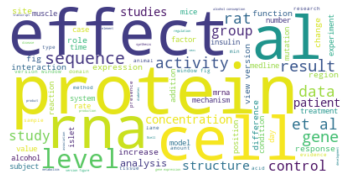

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
full_text_ = ' '.join(all_words_)
cloud_no_stopword_ = WordCloud(background_color='white', stopwords=stopwords).generate(full_text_)
plt.imshow(cloud_no_stopword_, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#13. Extract entities from nouns

# oneBigList = list()
# for art in chunkList:
#   oneBigList.append(' '.join(art))
# oneBigList[0]

nlp = en_core_sci_sm.load()

nlp_EntList = list()

for artChk, cls in chunkList:
  nlp_EntList.append((list(nlp(' '.join(artChk)).ents),cls))


# medTermsList = list()
# for ent in doc.ents:
#   medTermsList.append(str(ent))

displacy_image = displacy.render(doc, jupyter = True, style = 'ent')

NameError: ignored

In [ ]:
len(nlp_EntList)

## **Data Loading**

In [ ]:
#14. Document Tuples ([List of words],Class)

# documents=[(low,cls)
#           for category in movie_reviews.categories()
#           for fileid in movie_reviews.fileids(category)]
# print(documents[1]) #check it out
random.shuffle(nlp_EntList) #randomize the documents

In [ ]:
#15. Complete List [ALL Characters in ALL Documents/Body of Text]

all_words = list()
for row in nlp_EntList:
  for word in row[0]:
    all_words.append(str(word).lower())
len(all_words)

#all_words=[x.lower() for x in movie_reviews.words()]

181116

In [ ]:
#16. Most Common Character List of Tuples [(Character,Freq)]

all_words_freq=nltk.FreqDist(all_words)
most_freq_words=[i for i in all_words_freq.most_common(3000)] # get the most frequent word list

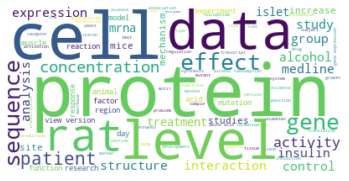

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
full_text = ' '.join(all_words)
cloud_no_stopword = WordCloud(background_color='white', stopwords=stopwords).generate(full_text)
plt.imshow(cloud_no_stopword, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
word_tokens = word_tokenize(full_text)
tokens = list()
for word in word_tokens:
    if word.isalpha() and word not in stopwords:
        tokens.append(word)
token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(20),columns=['Word', 'Frequency'])

,Word,Frequency
0,alcohol,2935
1,insulin,2373
2,cells,2360
3,protein,1981
4,patients,1954
5,expression,1721
6,gene,1561
7,data,1502
8,rats,1477
9,cell,1468


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(analyzer='word',stop_words='english',ngram_range=(2,2)) #Only bigrams
bigrams = vect.fit_transform(all_words)
# Creating a dataframe
bigram_df = pd.DataFrame(bigrams.toarray(), columns=vect.get_feature_names()) #get_feature_names() - gets unique words present in Reviews columns
bigram_frequency = pd.DataFrame(bigram_df.sum(axis=0)).reset_index()
bigram_frequency.columns = ['bigram', 'Frequency']
bigram_frequency = bigram_frequency.sort_values(by='Frequency', ascending=False).head(20)

In [ ]:
bigram_frequency.sort_values('Frequency', ascending=True).plot(x='bigram', y='Frequency',kind='barh')
plt.title("20 most frequent words")
plt.show()

NameError: ignored

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(analyzer='word',stop_words='english',ngram_range=(3,3)) #Only trigram
trigrams = vect.fit_transform(med_df['Articles'])
# Creating a dataframe
trigrams_df = pd.DataFrame(trigrams.toarray(), columns=vect.get_feature_names()) #get_feature_names() - gets unique words present in Reviews columns
trigrams_frequency = pd.DataFrame(trigrams_df.sum(axis=0)).reset_index()
trigrams_frequency.columns = ['trigram', 'Frequency']
trigrams_frequency = trigrams_frequency.sort_values(by='Frequency', ascending=False).head(20)

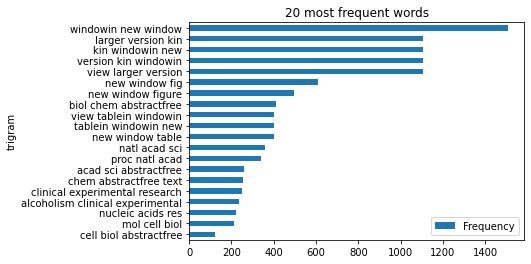

In [ ]:
trigrams_frequency.sort_values('Frequency', ascending=True).plot(x='trigram', y='Frequency',kind='barh')
plt.title("20 most frequent words")
plt.show()

In [ ]:
def get_sentence_word_count(text_list):
    sent_count = 0
    word_count = 0
    vocab = {}
    for cat in text_list:
      for art in cat:
        sentences=sent_tokenize(str(art).lower())
        sent_count = sent_count + len(sentences)
        for sentence in sentences:
            words=word_tokenize(sentence)
            for word in words:
                if(word in vocab.keys()):
                    vocab[word] = vocab[word] +1
                else:
                    vocab[word] =1 
    word_count = len(vocab.keys())
    return sent_count,word_count

In [ ]:
med_df = med_df[med_df['Articles'].notna()]
sent_count,word_count= get_sentence_word_count(med_df['Articles'].tolist())

print("Number of sentences in Medical Journal: "+ str(sent_count))
print("Number of unique words in Medical Journal: "+str(word_count))

KeyboardInterrupt: ignored

In [ ]:
#17. Document Dict (Bag of Words) {Character : Most_Common_Boolean}

def document_features(doc):
  words=set(doc) # get a unique list of all words
  features={} # start contructing the feature set
  for w in most_freq_words:
      features[w] = (w in words) # check if the 300 most frequent words are in the review
  return features

In [ ]:
#18. Feature Set [({List of Character/Doc : MCB },'Class')]

featureset=[(document_features(bog),cls) for (bog,cls) in nlp_EntList]

In [ ]:
len(featureset)*.70

191.1

In [ ]:
#19. Training and Testing Set
training_set = featureset[:192]
testing_set = featureset[192:]

## **Data Classification**

In [ ]:
#20. Training Classifier
classifier=nltk.NaiveBayesClassifier.train(training_set)

In [ ]:
print(classifier.classify(training_set[5][0]))

RNA


In [ ]:
#21. Evaluating Classifier 
print(nltk.classify.accuracy(classifier,testing_set)) # turns out the accuracy is 

0.2962962962962963


In [ ]:
classifier.show_most_informative_features(15)

Most Informative Features
      ('neutrophils', 9) = False          Diabet : RNA    =      1.0 : 1.0
          ('codons', 25) = False          Diabet : RNA    =      1.0 : 1.0
           ('phage', 10) = False          Diabet : RNA    =      1.0 : 1.0
     ('calibration', 14) = False          Diabet : RNA    =      1.0 : 1.0
          ('access', 29) = False          Diabet : RNA    =      1.0 : 1.0
         ('mathews', 37) = False          Diabet : RNA    =      1.0 : 1.0
      ('variables', 101) = False          Diabet : RNA    =      1.0 : 1.0
       ('cell line', 20) = False          Diabet : RNA    =      1.0 : 1.0
            ('souza', 8) = False          Diabet : RNA    =      1.0 : 1.0
    ('instructions', 13) = False          Diabet : RNA    =      1.0 : 1.0
        ('followup', 10) = False          Diabet : RNA    =      1.0 : 1.0
('transplantation', 132) = False          Diabet : RNA    =      1.0 : 1.0
     ('acamprosate', 40) = False          Diabet : RNA    =      1.0 : 1.0

In [ ]:
#22. Evaluating DT Classifier 
classifier_DT =nltk.DecisionTreeClassifier.train(training_set)
print(nltk.classify.accuracy(classifier_DT,testing_set)) # turns out the accuracy is 

0.2962962962962963


In [ ]:
[i for i in training_set[5][0].values() if i == True]


[]

In [ ]:
test = training_set[0][0]
test.values()

dict_values([False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 

In [ ]:
med_data = med_data[med_data['Desc'].notna()]
sent_count,word_count= get_sentence_word_count(med_data['Desc'].tolist())
print("Number of sentences in desc column: "+ str(sent_count))
print("Number of unique words in desc column: "+str(word_count))
#word cloud

In [ ]:
most_freq_words

[('rats', 377),
 ('rat', 275),
 ('patients', 272),
 ('version', 211),
 ('group', 193),
 ('medline', 190),
 ('expression', 175),
 ('data', 168),
 ('concentrations', 146),
 ('increase', 136),
 ('phosphorylation', 130),
 ('alcoholism', 127),
 ('animals', 127),
 ('activity', 126),
 ('alcoholics', 126),
 ('mice', 125),
 ('treatment', 124),
 ('ethanol', 115),
 ('research', 114),
 ('alcohol consumption', 114),
 ('cells', 110),
 ('groups', 104),
 ('target', 101),
 ('tissues', 101),
 ('weeks', 99),
 ('children', 99),
 ('igfbp', 93),
 ('effect', 92),
 ('introns', 89),
 ('concentration', 86),
 ('levels', 85),
 ('individuals', 84),
 ('neurons', 83),
 ('level', 82),
 ('evidence', 78),
 ('proteins', 77),
 ('mechanism', 77),
 ('subjects', 77),
 ('sequence', 73),
 ('exposure', 72),
 ('development', 71),
 ('interaction', 70),
 ('methodsreferences', 68),
 ('analysis', 68),
 ('relationship', 67),
 ('mmoll', 66),
 ('association', 65),
 ('men', 64),
 ('experiments', 64),
 ('effects', 63),
 ('humans', 63),


In [ ]:
len(training_set)

192

In [ ]:
dbt = list()
acl = list()
rn = list()
for ele in training_set:
  if ele[1] == 'Diabetes':
    dbt.append([i for i in set(ele[0]) if i in most_freq_words])
  if ele[1] == 'Alcohol':
    acl.append([i for i in set(ele[0]) if i in most_freq_words])
  if ele[1] == 'RNA':
    rn.append([i for i in set(ele[0]) if i in most_freq_words])

In [ ]:
training_set[185][1]

'RNA'

In [ ]:
print('Common Words in Diabetes:',len(dbt))
print('Common Words in Alcohol:',len(acl))
print('Common Words in RNA:',len(rn))

Common Words in Diabetes: 91
Common Words in Alcohol: 91
Common Words in RNA: 10


In [ ]:
for ele in training_set[:5]:
  print(set(ele[0]))

{'runoff', 'insulin release', 'splicingdependent', 'colocalization', 'seizures', 'z', 'deletions', 'consistency', 'expectations', 'affinity chromatography', 'transcript', 'measurements', 'premature termination', 'lilley', 'film', 'assistance', 'antitermination', 'investigation', 'case', 'specimens', 'mimics', 'insertion', 'hultman', 'protein metabolism', 'hobbies', 'provision', 'paul', 'infants', 'cell medline', 'alcohol consumption journal', 'xenopus', 'thymidine', '’ ‘', 'cholesteryl', 'selection', 'pedersen', 'neurotransmission', 'transactivation', 'categories', 'kinetics', 'membranes', 'glycemia', 'recommendations', 'aaaarm', 'export factors', 'drinking problems', 'shape', 'cell lines', 'amino acid', 'interferon therapy', 'human', 'sugar', 'receptor function', 'chick', 'cell death', 'dahlberg', 'articles', 'variants', 'lipoproteins', 'departments', 'volunteers', 'liver cirrhosis', 'cline', 'hypotheses', 'linkage analysis', 'science', 'cost', 'rnai', 'incubation', 'blood', 'sensitiv

In [ ]:
len(training_set[0][0])

3000